In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
df.head()

,title,author,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,1


In [ ]:
# Revisar valores nulos
df.isnull().sum()

title      558
author    1957
label        0
dtype: int64

In [ ]:
# Eliminar valores nulos
df = df.dropna()

In [ ]:
# Revisar valores duplicados
df.duplicated().sum()

164

In [ ]:
# Eliminar valores duplicados
df = df.drop_duplicates(keep='first')

In [ ]:
# Combinar tanto el autor como el título de las columnas y crear un nuevo contenido de columna
df['content'] = df['title'] + ' ' + df['author'] 

In [ ]:
df.head()

,title,author,label,content
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,Why the Truth Might Get You Fired,Consortiumnews.com,1,Why the Truth Might Get You Fired Consortiumne...
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,1,15 Civilians Killed In Single US Airstrike Hav...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,1,Iranian woman jailed for fictional unpublished...


In [ ]:
# importar las librerias que se requieren para el preproceso
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

ps = PorterStemmer()

In [ ]:
# Función para la transformación de texto completo

def text_preprocessing(text): 
    # Convertir texto a minúsculas

    text = text.lower()
    
    # Tokenizar texto en una lista 
    tokenize_text = nltk.word_tokenize(text)
    
    # Remover los Stopwords
    text_without_stopwords = [i for i in tokenize_text if i not in stopwords.words('english')]
    
    # Remover la puntuación
    text_without_punc = [i for i in text_without_stopwords if i not in string.punctuation]
    
    # Obtener solo valores alfanuméricos y aplicar derivación en esa palabra
    transformed_text = [ps.stem(i) for i in text_without_punc if i.isalnum() == True]
    
    return " ".join(transformed_text)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df['transformed_content'] = df['content'].apply(text_preprocessing)

In [ ]:
# Eliminar el autor del título y la columna de contenido anterior
df = df.drop(['title','author','content'],axis=1)

In [ ]:
df.head()

,label,transformed_content
0,1,hous dem aid even see comey letter jason chaff...
1,0,flynn hillari clinton big woman campu breitbar...
2,1,truth might get fire
3,1,15 civilian kill singl us airstrik identifi je...
4,1,iranian woman jail fiction unpublish stori wom...


In [ ]:
# Crearemos una nueva columna como número de caracteres y número de palabras
df['number_of_characters'] = df['transformed_content'].apply(lambda x:len(x))
df['number_of_words'] = df['transformed_content'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,label,transformed_content,number_of_characters,number_of_words
0,1,hous dem aid even see comey letter jason chaff...,67,12
1,0,flynn hillari clinton big woman campu breitbar...,60,9
2,1,truth might get fire,20,4
3,1,15 civilian kill singl us airstrik identifi je...,59,9
4,1,iranian woman jail fiction unpublish stori wom...,84,12


EDA(Exploratory Data Analysis)

<Axes: xlabel='label', ylabel='count'>

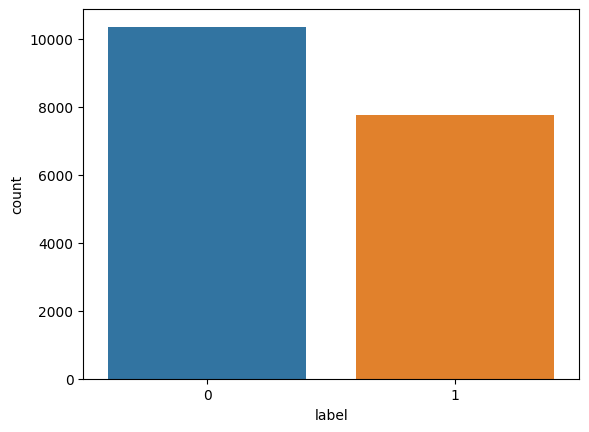

In [ ]:
# Comprobar el número de etiquetas

sns.countplot(x='label',data=df)

In [ ]:
# Información estádistica para noticias verdaderas
df[['number_of_characters','number_of_words']][df['label'] == 0].describe()

,number_of_characters,number_of_words
count,10355.000000,10355.000000
mean,71.675519,11.721004
std,14.937684,2.313864
min,23.000000,4.000000
25%,62.000000,10.000000
50%,71.000000,12.000000
75%,81.000000,13.000000
max,146.000000,24.000000


In [ ]:
# Información estádistica para noticias falsas
df[['number_of_characters','number_of_words']][df['label'] == 1].describe()

,number_of_characters,number_of_words
count,7766.000000,7766.000000
mean,59.008499,9.361834
std,22.807008,3.557842
min,3.000000,1.000000
25%,45.000000,7.000000
50%,58.000000,9.000000
75%,71.000000,11.000000
max,306.000000,47.000000


<Axes: xlabel='number_of_words', ylabel='Count'>

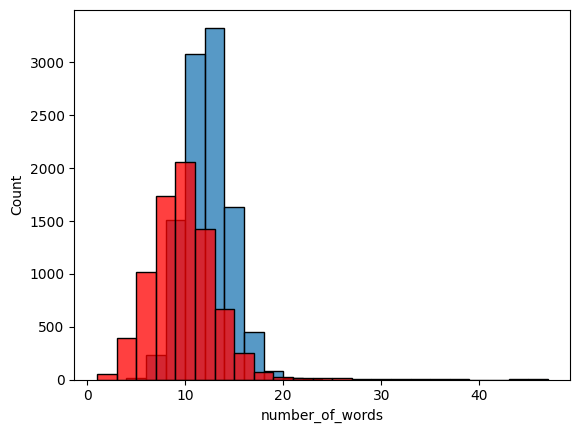

In [ ]:
# Histplot para Fake News words y True News words
sns.histplot(df['number_of_words'][df['label'] == 0],bins=50,binwidth=2)
sns.histplot(df['number_of_words'][df['label'] == 1],color='red',binwidth=2)

Hagamos un Wordcloud de palabras de noticias verdaderas y falsas respectivamente. Así, podemos analizar qué palabras se suelen utilizar en ambos tipos de noticias.

In [ ]:
# importar wordcloud
from wordcloud import WordCloud

# make object of wordcloud
wc = WordCloud(background_color='white',min_font_size=10,width=500,height=500)

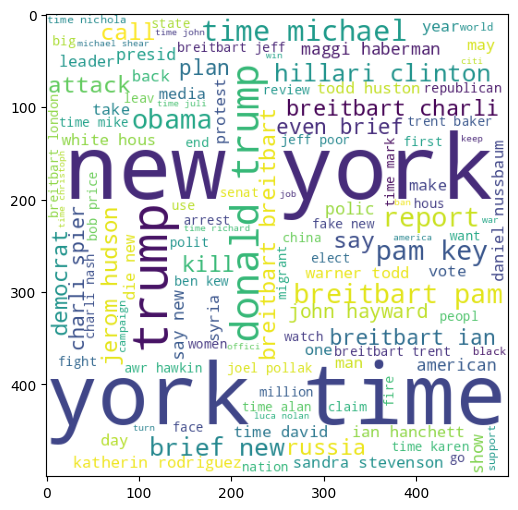

In [ ]:
# WordCloud para True News
true_news_wc = wc.generate(df[df['label'] == 0]['transformed_content'].str.cat(sep=" "))
plt.figure(figsize=(8,6))
plt.imshow(true_news_wc)
plt.show()

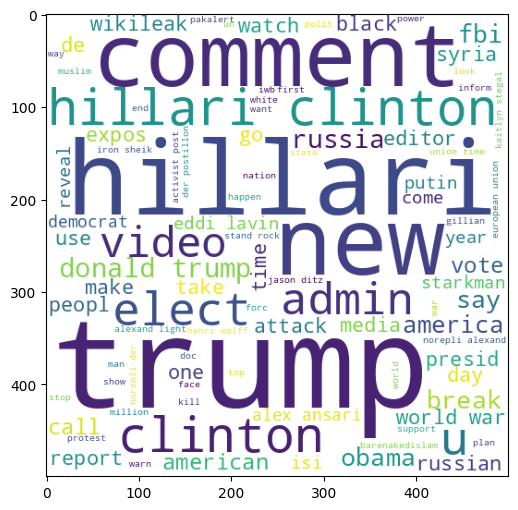

In [ ]:
# WordCloud para Fake news
fake_news_wc = wc.generate(df[df['label'] == 1]['transformed_content'].str.cat(sep = " "))
plt.figure(figsize=(8,6))
plt.imshow(fake_news_wc)
plt.show()

Podemos ver claramente en esta nube de palabras qué palabras se usan más en noticias verdaderas y falsas



* Vamos a buscar el conteo de palabras espeficificas.



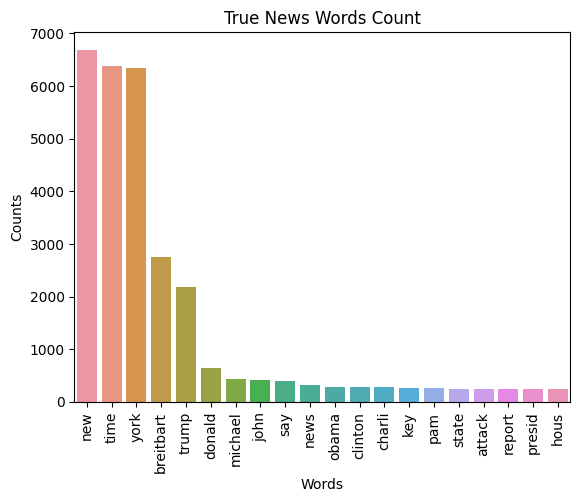

In [ ]:
# Libreria para Count Words
from collections import Counter

# Crear una lista de True News words
true_news_words_list = df[df['label']==0]['transformed_content'].str.cat(sep = " ").split()

# crear un DataFrame de la lista
true_news_words_df = pd.DataFrame(Counter(true_news_words_list).most_common(20))

# Crearemos un barplot para estas palabras
sns.barplot(x=true_news_words_df[0],y=true_news_words_df[1])
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('True News Words Count')
plt.show()

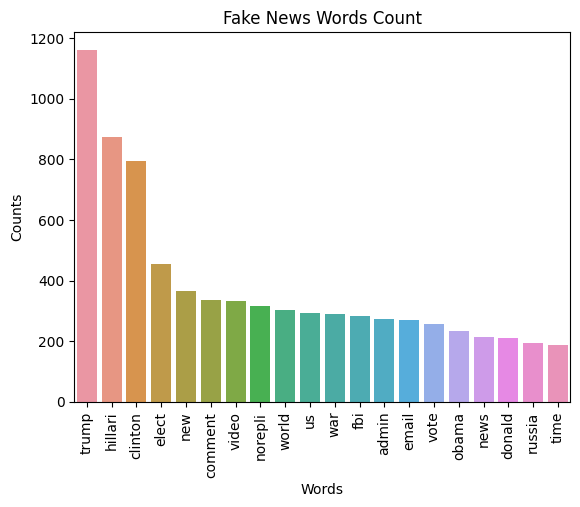

In [ ]:
# Crear una lista de Fake News words
fake_news_words_list = df[df['label']==1]['transformed_content'].str.cat(sep = " ").split()

# Crear un DataFrame.
fake_news_words_df = pd.DataFrame(Counter(fake_news_words_list).most_common(20))

# Crear un barplot para estas palabras
sns.barplot(x=fake_news_words_df[0],y=fake_news_words_df[1])
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Fake News Words Count')
plt.show()

División de caracteristicas.

In [ ]:
# Separemos nuestras columnas de entrada y salida
X = df['transformed_content'].values
y = df['label'].values

In [ ]:
# Haremos el Train Test Split de nuestros datos.
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
# Ahora hagamos la vectorización del contenido transformado usando la técnica de Bagwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# Crear un objeto de CountVectorizer
cf = CountVectorizer(max_features=5000)

In [ ]:
# Convertir X_train and Y_train en Vectores
X_trf =  cf.fit_transform(X).toarray()
X_train = cf.fit_transform(X_train).toarray()
X_test = cf.transform(X_test).toarray()

In [ ]:
# Importar los modelos requeridos 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.model_selection import GridSearchCV,ShuffleSplit,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [ ]:
# Función para encontrar el mejor modelo y parámetros de ese modelo.
def check_model(X,y):
    algos = {
        'lgr':{
            'model':LogisticRegression(),
            'params':{
                'C':[0.1,0.01,1,0.5,2,10,20]
            }
        },
        'mnb':{
            'model':MultinomialNB(),
            'params':{
                
            }
        },
        'bnb':{
            'model':BernoulliNB(),
            'params':{
            
            }
        },
        'gnb':{
            'model':GaussianNB(),
            'params':{
            
            }
        },
    }
    
    score = []
    
    for model_name,config in algos.items():
        cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=42)
        gd = GridSearchCV(estimator=config['model'],param_grid=config['params'],n_jobs=-1,cv=cv)
        gd.fit(X,y)
        score.append({'model_name':model_name,'acc_score':gd.best_score_,'best_params':gd.best_params_})
        
    return pd.DataFrame(score)
        

In [ ]:
# Resultados del modelo y sus mejores parámetros
check_model(X_trf,y)

,model_name,acc_score,best_params
0,lgr,0.990676,{'C': 20}
1,mnb,0.968552,{}
2,bnb,0.981462,{}
3,gnb,0.894179,{}


In [ ]:
# Vamos a evaluar el modelo 
def model_evaluation(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_acc = accuracy_score(y_train,train_pred)
    test_acc = accuracy_score(y_test,test_pred)
    
    train_score = pd.Series({'accuracy_score':accuracy_score(y_train,train_pred),'precision_score':precision_score(y_train,train_pred)})
    test_score = pd.Series({'accuracy_score':accuracy_score(y_test,test_pred),'precision_score':precision_score(y_test,test_pred)})
    scorecard = pd.concat([train_score,test_score],axis=1)
    
    scorecard.columns = ['Train_data','Test_data']
    
    return scorecard

In [ ]:
# Evaluación del modelo de Logistic Regression
model_evaluation(LogisticRegression(C=10),X_train,X_test,y_train,y_test)

,Train_data,Test_data
accuracy_score,0.999862,0.991172
precision_score,1.000000,0.989075


In [ ]:
# Evaluación del modelo MultinomialNB
model_evaluation(MultinomialNB(),X_train,X_test,y_train,y_test)

,Train_data,Test_data
accuracy_score,0.979236,0.963862
precision_score,0.994148,0.987663


In [ ]:
model_evaluation(BernoulliNB(),X_train,X_test,y_train,y_test)

,Train_data,Test_data
accuracy_score,0.987790,0.979586
precision_score,0.982723,0.975578


In [ ]:
model_evaluation(GaussianNB(),X_train,X_test,y_train,y_test)

,Train_data,Test_data
accuracy_score,0.945709,0.908414
precision_score,0.890906,0.850746






* La regresión logística nos está dando el mejor resultado de todo el modelo. 
Entonces, vamos a usar la regresión logística aquí.





In [ ]:
# Build Final Model
lg = LogisticRegression(C=10)
lg.fit(X_train,y_train)

LogisticRegression(C=10)

In [ ]:
p1 = X_test[0]
lg.predict(p1.reshape(1,-1))[0]

1

In [ ]:
def predict_news(text):
    cleaned_text = text_preprocessing(text)
    ps = pd.Series(cleaned_text)
    final_text = cf.transform(ps).toarray()
    pred = lg.predict(final_text.reshape(1,-1))[0]
    
    if pred == 0:
        print("It's a True News")
    
    else:
        print("It's a Fake News")

In [ ]:
predict_news("jame comey loretta lynch tri influenc statement hillari clinton investig charli spier")

It's a True News


In [ ]:
# Model Evaluation of Logistic Regression
model_evaluation(lg,X_train,X_test,y_train,y_test)

,Train_data,Test_data
accuracy_score,0.999862,0.991172
precision_score,1.000000,0.989075
